In [248]:
import wbgapi as wb
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
import plotly.express as px
from pandas import DataFrame
import plotly.express as px
from tabulate import tabulate
import plotly.graph_objs as go
import statsmodels.api
import statsmodels
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.covariance import EllipticEnvelope

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:10px; padding-bottom:10px;text-align: center;">Methodology-for-Outliers-Detection</h1>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px; padding-bottom:20px;margin-bottom:-10px">
Economics as a science of scarcity places the necessity of studying the economic system in the direction of increasing its efficiency. More and more models close to "reality" are being created that make it possible to understand and predict economic dynamics in order to create effective and responsive economic and social public policies. An important factor in this direction is that all steps from the correct measurement of economic phenomena, to the correct collection of the data, cleaning and preparation of the data are optimal. Only then will the models that step on this data be correct and give the right answers.
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The present study presents the different methods and techniques for analyzing one of the basic steps before running the models - the detection of outliers and anomalies. The theory of "end values", their types, the factors behind their occurrence and the meaning behind each "end value" will be briefly presented.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The purpose of the study is not to show which of these "end values" are bad, wrong or unnecessary, but rather to show different approaches to distinguishing them, which will provide the necessary information for the next step in dealing with them.</p>
<p style="color:black; background-color:white; padding:5px;">As an example of analysis, the database of the World Bank will be used, and specifically indicators for the level of employment and unemployment.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Let's briefly introduce what outliers and anomalies are in data, how they are related, and how they differ.</p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. Outliers are data points which lie at an abnormal distance from other points in a random sample from a population. In statistics, an outlier is a data point that differs significantly from other observations.</ul>
<li style="color:black; background-color:white; padding:5px"><i>We will generally define outliers as samples that are exceptionally far from the mainstream of the data.</i> — Page 33, Applied Predictive Modeling, 2013.</li>
<li style="color:black; background-color:white; padding:5px"><i>An outlier is an observation that lies outside the overall pattern of a distribution</i> — (Moore and McCabe 1999)</li>
<p style="color:black; background-color:white; padding:5px; padding-bottom:20px; margin-bottom:-15px">Anomalies are referred to values, which do not conform to an expected pattern of the other values in the data set. Anomalies are referred to as a different distribution that occurs within a distribution. In other words, if outliers we can understand them as extreme values, usually single, rare, apparently different caused by multiple factors from errors in collecting part of the data to sharp external influences that distort the values. In contrast, anomalies are rather different values that follow their own behavior, in most cases a few, which is not so much extreme as different in logic from the rest of the values. Reasons that can cause anomalies are the influence of factors at a certain moment that change the behavior of the values. Anomalies are patterns of different data within given data, whereas Outliers would be merely extreme data points within data. If not aggregated appropriately, anomalies may be neglected as outliers. Despite this general definition of outliers and anomalies, in many cases these terms are used interchangeably and the difference between them depending on the case may be difficult to detect. But still revealing the behavior in the final values - random or logical is important when working with them.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">1. Outliers are divided according to several characteristics. Depending on the number, we distinguish:</p>
<li style="color:black; background-color:white; padding:5px">A univariate outlier is a data point that consists of an extreme value on one variable. </li>
<li style="color:black; background-color:white; padding:5px">A multivariate outlier is a combination of unusual scores on at least two variables. </li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">2. Depending on their number and behavior, we distinguish the following three types of outliers:</p>
<li style="color:black; background-color:white; padding:5px">Point outlier: If an individual data point can be considered as anomalous with respect to the rest of the data, then the instance is termed as a point outlier.</li>
<li style="color:black; background-color:white; padding:5px">Contextual outliers: If a data instance is anomalous in a specific context (but not otherwise), then it is termed as a contextual outlier. Attributes of data objects should be divided into two groups :
(Contextual attributes: defines the context, e.g., time & location)
(Behavioural attributes: characteristics of the object, used in outlier evaluation, e.g., temperatur) </li>
<li style="color:black; background-color:white; padding:5px">Collective outliers: If a collection of data points is anomalous concerning the entire data set, it is termed as a collective outlier. </li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">3. According to whether we analyze current and future data, we can distinguish the following approaches:</p>
<li style="color:black; background-color:white; padding:5px">outlier detection: The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.</li>
<li style="color:black; background-color:white; padding:5px">novelty detection: The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.</li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">Outlier detection and novelty detection are both used for anomaly detection, where one is interested in detecting abnormal or unusual observations. Outlier detection is then also known as unsupervised anomaly detection and novelty detection as semi-supervised anomaly detection.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">4. Depending on the reasons for the occurrence of outliers, we can designate the most common ones as:</p>
<li style="color:black; background-color:white; padding:5px">Errors in measuring or collecting the data </li>
<li style="color:black; background-color:white; padding:5px">Errors in data extraction, processing or manipulation</li>
<li style="color:black; background-color:white; padding:5px">Human error when entering, loading the data.</li>
<li style="color:black; background-color:white; padding:5px">Natural occurrences of outliers that aren’t errors, which can be called dataset novelties.</li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">5. The importance of detecting outliers and anomalies is enormous. Not only the improvement of the data from the point of view of applying subsequent models but also as a red light in many cases. As examples of the importance of detecting outliers and anomalies we can mention:</p>
<li style="color:black; background-color:white; padding:5px">Medicine: An anomalous values in blood or other indicators may indicate the presence of a malignant tumor, or other hidden illnes;</li>
<li style="color:black; background-color:white; padding:5px">Cyberattacks: Outlieres may indicate security breaches;</li>
<li style="color:black; background-color:white; padding:5px">Fraud detection: An outlier credit card transaction or an abnormal buying pattern can indicate a credit card theft or an identity theft;</li>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The methodology of the present study is based on the study of economic data related to the labor market. The aim of the research is to reveal the different techniques for distinguishing anomalies and outliers in economic data. The data parameters are as follows:</p>
<li style="color:black; background-color:white; padding:5px">Database used: World Bank ( https://data.worldbank.org/ ) </li>
<li style="color:black; background-color:white; padding:5px">Indicators used: employment rate (https://data.worldbank.org/indicator/SL.EMP.TOTL.SP.NE.ZS) and unemployment rate (https://data.worldbank.org/indicator/SL. UEM.TOTL.NE.ZS).</li>
<li style="color:black; background-color:white; padding:5px">Year of analysis: 2015</li>
<li style="color:black; background-color:white; padding:5px">Scope of analysis: countries worldwide (WLD)</li>

<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The methodology includes the following two main steps:</p>
<li style="color:black; background-color:white; padding:5px">Preprocessing: preparing the data for analysis including loading the data, familiarizing the data and removing missing data. </li>
<li style="color:black; background-color:white; padding:5px">Anomaly/outlier analysis: using different tools to reveal outliers based on graphical method, statistical toolkit, distance and depth techniques, deep learning methods, clustering. linear etc.</li>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one. Preprocessing</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px"> In this first step, the database will be prepared using the following sub-steps:</ul>
<li style="color:black; background-color:white; padding:5px">Data from the World Bank database will be loaded;</li>
<li style="color:black; background-color:white; padding:5px">The key features of the data will be revealed;</li>
<li style="color:black; background-color:white; padding:5px">Missing data will be removed/li>
<li style="color:black; background-color:white; padding:5px">The data will be visualized</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Load the data</h4>
<p style="color:black; background-color:white; padding:5px;">
A function is created to load the data from the World Bank database according to selected parameters: employment and unemployment indicators with a worldwide scope.</p>

In [259]:
def load_and_name_db_WB (db, *args):
    global df_name
    df_name = db
    globals()[df_name] = wb.data.DataFrame(indicators, wb.region.members(region), range(start_period, end_period))
    globals()[df_name].columns = (new_column_names)
    globals()[df_name] = globals()[df_name].round(2) 
    return globals()[df_name]

In [260]:
name_db = "empl_unempl_world"
indicators = ['SL.UEM.TOTL.NE.ZS', "SL.EMP.TOTL.SP.NE.ZS"]
new_column_names = ['employment', "unemployment"]
region = "WLD"
start_period = 2015
end_period = 2016

load_and_name_db_WB(name_db, indicators, region, start_period, end_period)

,employment,unemployment
economy,,
ABW,NaN,NaN
AFG,NaN,NaN
AGO,NaN,NaN
ALB,45.96,17.19
AND,NaN,NaN
...,...,...
XKX,22.49,32.84
YEM,NaN,NaN
ZAF,44.50,22.87


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of basic information about the data</h4>
<p style="color:black; background-color:white; padding:5px;">
In addition to the previous substep, it is important to outline the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.</p>

In [67]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("------------------------------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("------------------------------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("------------------------------------------------------")

    list_objects = []
    list_int = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
        elif df[col].dtypes == "int64" or df[col].dtypes == "int32":
            list_int += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" int = {list_int} \n")
    print(f" float64 = {list_float64}")

In [87]:
db_info(empl_unempl_world)

1. Оbservations and features: 
 217 Оbservations and 2 features
------------------------------------------------------
2. Number of cases in the table: 434
------------------------------------------------------
3. The sum of element types by type is as follows: 
 float64    2
dtype: int64
------------------------------------------------------
4. Group the features by data type:
 object = [] 

 int = [] 

 float64 = ['employment', 'unemployment']


<p style="color:black; background-color:white; padding:5px;">We see that the data has 434 cases arranged in two columns whose values are floats and a total of 217 rows.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Missing values</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, all missing values are removed.</p>

In [261]:
empl_unempl_world = empl_unempl_world.dropna(axis = 0, how = 'any')
empl_unempl_world

,employment,unemployment
economy,,
ALB,45.96,17.19
ARM,50.92,18.26
AUS,61.06,6.05
AUT,57.11,5.80
AZE,62.10,4.96
...,...,...
USA,59.34,5.28
UZB,68.19,5.15
VNM,75.77,1.85


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Visualization</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, we use a scatterplot to visualize the data for the two indicators.</p>

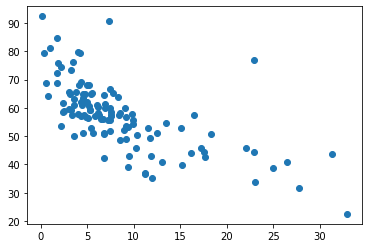

In [90]:
plt.scatter(empl_unempl_world["unemployment"], empl_unempl_world["employment"])
plt.show()

<p style="color:black; background-color:white; padding:5px;">The graph above shows how 114 countries around the world are positioned in terms of employment and unemployment levels in 2014-2015.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step four: Outliers</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">This step, which is central to this report, considers the following anomaly analysis toolkit:</ul>
<li style="color:black; background-color:white; padding:5px">1. Graphic techniques;</li>
<li style="color:black; background-color:white; padding:5px">2. Statistical techniques;</li>
<li style="color:black; background-color:white; padding:5px">3. Probalistics techniques;</li>
<li style="color:black; background-color:white; padding:5px">4. Distance-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">5. Density-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">6. Clustering tehniques;</li>
<li style="color:black; background-color:white; padding:5px">7. Tree-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">8. Linear tehniques;</li>
<li style="color:black; background-color:white; padding:5px">9. Deviation based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">10. Neural-network based tehniques</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1. Graph based tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic graphical tools for anomaly visualizations will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Histograms;</li>
<li style="color:black; background-color:white; padding:5px">Boxplots;</li>

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-5px">1.1. Histograms</h4>
<p style="color:black; background-color:white; padding:5px;">The histograms are the most commonly used graph to show frequency distributions.</p>

In [91]:
def histogram_outliers(df):
    for i in df:
        fig = px.histogram(df, x=i, marginal="box",width=700, height=400)
        fig.show(renderer="svg")

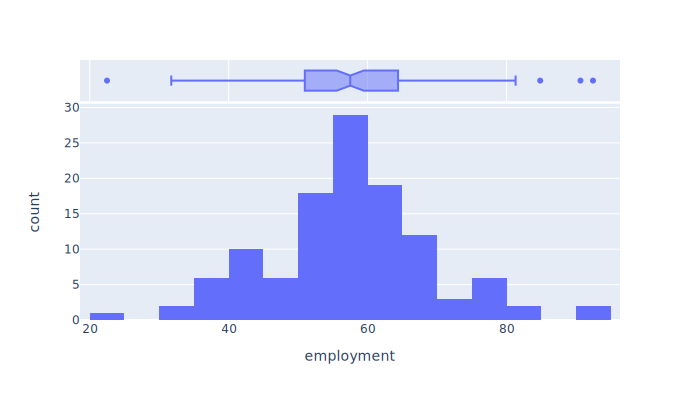

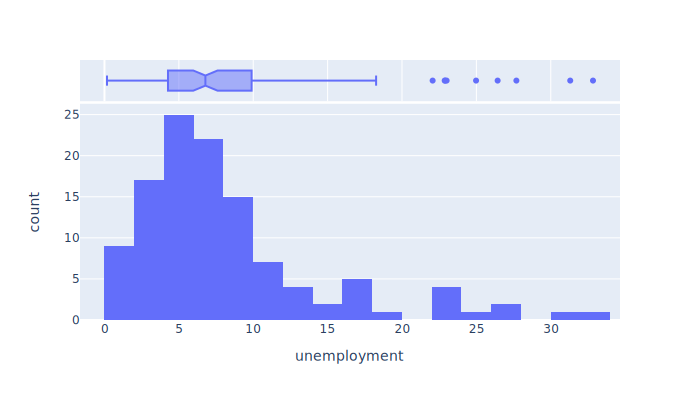

In [92]:
histogram_outliers(empl_unempl_world)

<p style="color:black; background-color:white; padding:5px;">Histograms show through their "tails" the possible presence of anomalies in the data distribution, indicator by indicator. In the case of the unemployment level, there is a clear possibility of anomalies.</p>

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-5px">1.2. Boxplot</h4>
<p style="color:black; background-color:white; padding:5px;">A boxplot is a way of displaying the distribution of data based on a five value summary ("minimum", "maximum", first quartile [Q1], median, third quartile [Q3])</p>

In [82]:
def boxplots_outliers(df):
    for x in df:
        fig = go.Figure()
        fig.add_trace(go.Box(
            y=df[x],
            name="All Points",
            jitter=0.3,
            pointpos=-1.8,
            boxpoints='all',
            marker_color='rgb(7,40,89)',
            line_color='rgb(7,40,89)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Only Whiskers",
            boxpoints=False,
            marker_color='rgb(9,56,125)',
            line_color='rgb(9,56,125)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Suspected Outliers",
            boxpoints='suspectedoutliers',
            marker=dict(
                color='rgb(8,81,156)',
                outliercolor='rgba(219, 64, 82, 0.6)',
                line=dict(
                    outliercolor='rgba(219, 64, 82, 0.6)',
                    outlierwidth=2)),
            line_color='rgb(8,81,156)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Whiskers and Outliers",
            boxpoints='outliers',
            marker_color='rgb(107,174,214)',
            line_color='rgb(107,174,214)'
        ))


        fig.update_layout(title_text=x)
        fig.show(renderer="svg")

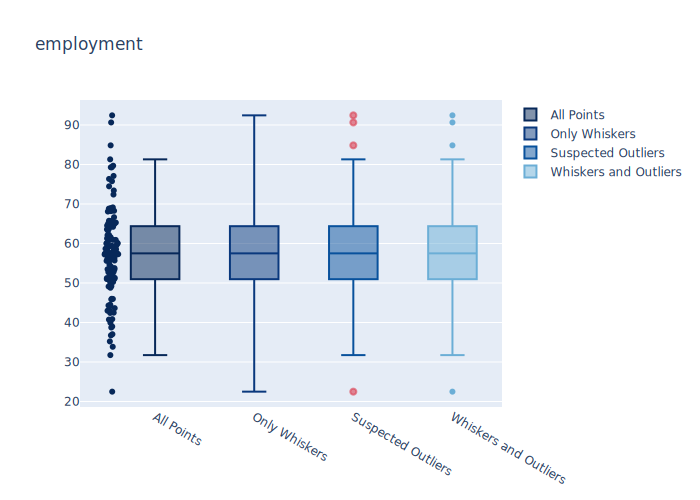

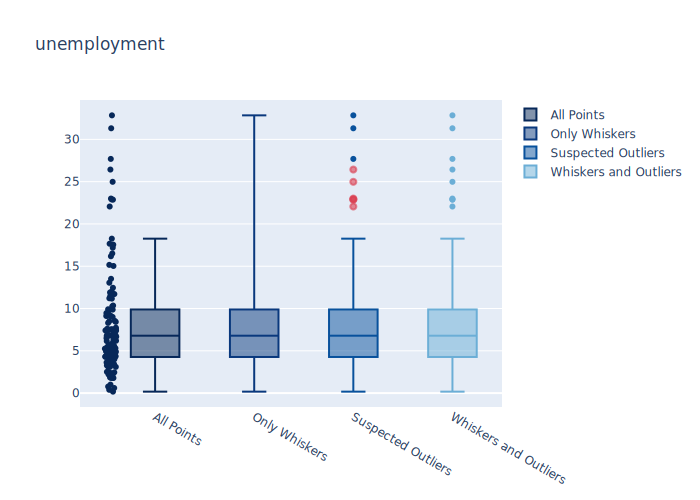

In [93]:
boxplots_outliers(empl_unempl_world)

<p style="color:black; background-color:white; padding:5px;">The boxplots clearly reveal the cases for each indicator that are anomalies according to the values they have.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">2. Statistical tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic statistical tools for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Common descriptive statistics;</li>
<li style="color:black; background-color:white; padding:5px">Z-score;</li>
<li style="color:black; background-color:white; padding:5px">Interquartile Range;</li>
<li style="color:black; background-color:white; padding:5px">Standard Deviation;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2.1. Descriptive statistics</h4>
<p style="color:black; background-color:white; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

In [94]:
statsmodels.stats.descriptivestats.describe(empl_unempl_world).round(2)

,employment,unemployment
nobs,116.00,116.00
missing,0.00,0.00
mean,57.46,8.38
std_err,1.12,0.61
upper_ci,59.66,9.57
lower_ci,55.27,7.18
std,12.05,6.56
iqr,13.32,5.59
iqr_normal,9.87,4.15
mad,8.88,4.72


<p style="color:black; background-color:white; padding:5px;">Even at first glance, comparing the average value of the two indicators and the maximum values, we see the following: At 57% average value of the employment ratio, the maximum value is over 92%, which is 35 percentage points higher. In terms of unemployment, we have an average value of just over 8% and a maximum of over 32%.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2.2. Z-score</h4>
<p style="color:black; background-color:white; padding:5px">The Z-score indicates how far away a certain point is from the mean. By applying Z-transformation we shift the distribution and make it 0 mean with unit standard deviation.  If the Z-score is >3 that point can be marked as outlier. </p>

In [272]:
def zscore_outliers(df, indicators):
    for indicator in indicators:
        outliers = []
        zscore = []
        threshold = 3
        mean = np.mean(df[indicator])
        std = np.std(df[indicator])
        
        for i in df[indicator]:
            z_score= (i - mean)/std 
            zscore.append(z_score)
            if np.abs(z_score) > threshold:
                outliers.append(i)
        print("Total number of outliers are",len(outliers))
        
        print(f"The Outliers are : \n{outliers}\n")

        plt.figure(figsize = (10,5))
        sns.distplot(zscore).set_title(indicator)
        plt.xlabel("Z-score")
        plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.5, color='red')
        plt.show()

Total number of outliers are 0
The Outliers are : 
[]



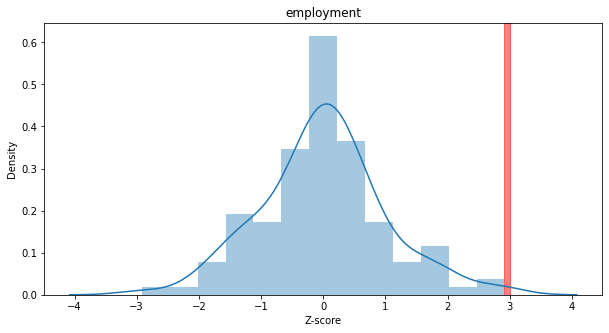

Total number of outliers are 2
The Outliers are : 
[31.31, 32.84]



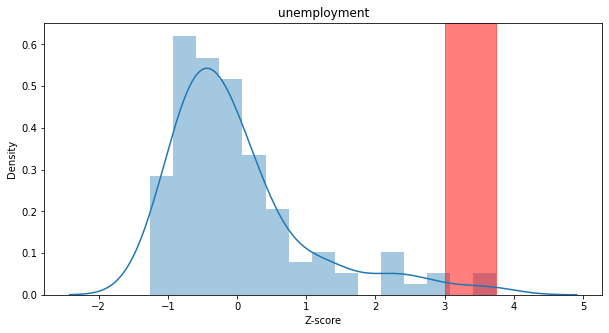

In [273]:
indicators = ["employment", "unemployment"]
zscore_outliers(empl_unempl_world, indicators)

In [278]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to rejection {(~good).sum()} points")
    return good

def z_score_outliers(df, val1, val2):
    plt.figure(figsize=(12, 8))

    for i, threshold in zip(range(1, 5), range(1, 5)):
        plt.subplot(2, 2, i)
        good = z_score(df[val1], threshold=threshold)
        plt.scatter(df[val1][good], df[val2][good], s=10, label="Good", color="#4CAF50")
        plt.scatter(df[val1][~good], df[val2][~good], s=10, label="Bad", color="#F44336")
        plt.legend()
        plt.title(f"{val1} (threshold={threshold})")
        plt.xlabel("rate of employment")
        plt.ylabel("rate of unemployment")
    plt.tight_layout()

z-score of 1 corresponds to rejection 25 points
z-score of 2 corresponds to rejection 9 points
z-score of 3 corresponds to rejection 2 points
z-score of 4 corresponds to rejection 0 points


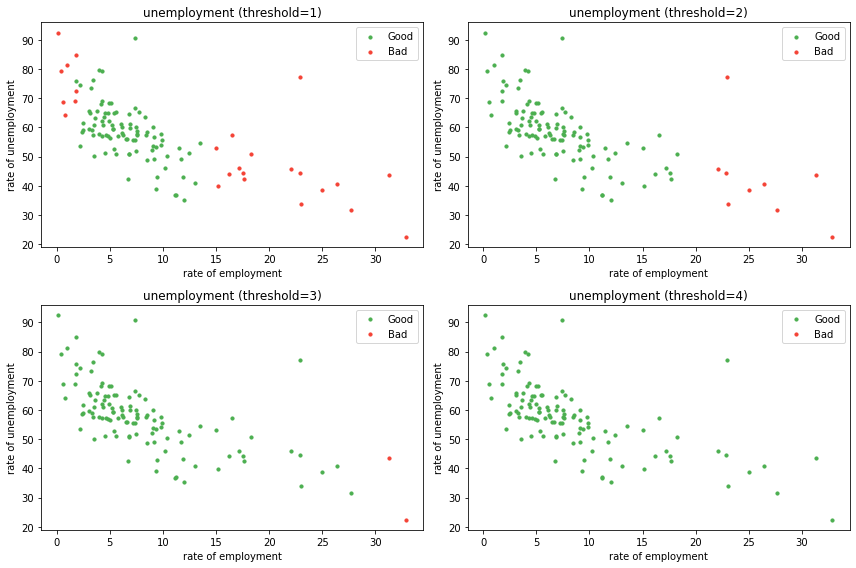

In [279]:
key_value = 'unemployment'
other_value = "employment"
z_score_outliers(empl_unempl_world, key_value,other_value)

z-score of 1 corresponds to rejection 32 points
z-score of 2 corresponds to rejection 5 points
z-score of 3 corresponds to rejection 0 points
z-score of 4 corresponds to rejection 0 points


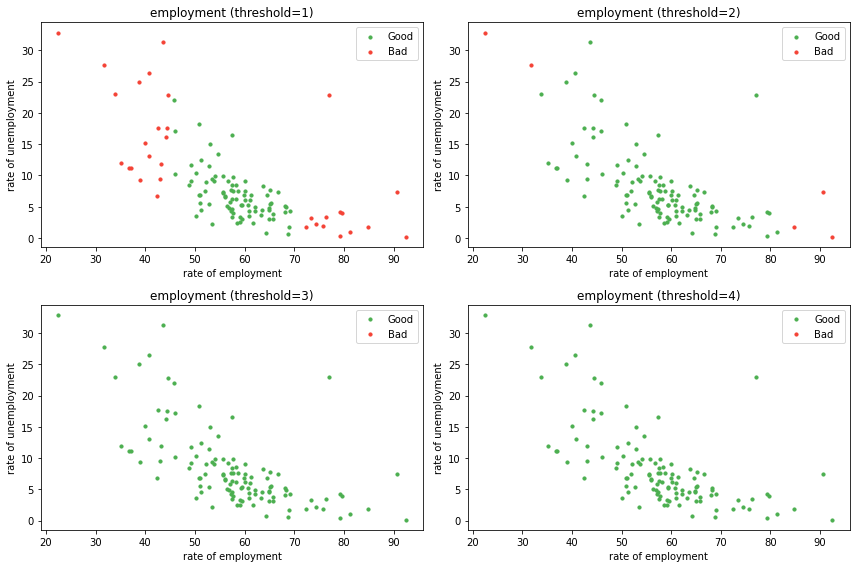

In [280]:
key_value = 'employment'
other_value = "unemployment"
z_score_outliers(empl_unempl_world, key_value,other_value)

<p style="color:black; background-color:white; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-8px">2.3. Interquartile Range Method</h4>
<p style="color:black; background-color:white; padding:5px">The difference between Q3 and Q1 (difference between the third quartile and the first quartile ) is called the Inter-Quartile Range or IQR. Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.</p>

In [285]:
def www (df, indicators):
    for indicator in indicators:
        Q1 = df[indicator].quantile(0.25)
        Q3 = df[indicator].quantile(0.75)# Calculate "IQR" for Height column
        IQR = Q3 - Q1

        Upper_Limit = round(Q3 + 1.5*IQR,2)
        Lower_Limit = round(Q1 - 1.5*IQR,2)
        print(f"Upper Limit : {Upper_Limit}")
        print(f"Lower Limit : {Lower_Limit}")

        outliers = df[indicator][(df[indicator]>Upper_Limit ) | (df[indicator] < Lower_Limit)]
        print(f"Outliers in {indicator} column : \n{outliers}\n")
        print(f"Number of Outliers : {outliers.shape[0]}")


        plt.figure(figsize = (10,6))
        sns.distplot(df[indicator], kde=False).set_title(indicator)
        plt.axvspan(xmin = Lower_Limit,xmax= df[indicator].min(),alpha=0.5, color='red')
        plt.axvspan(xmin = Upper_Limit,xmax= df[indicator].max(),alpha=0.5, color='red')
        
        plt.xlabel(f"rate of {indicator}")

        plt.show()

Upper Limit : 84.28
Lower Limit : 31.0
Outliers in employment column : 
economy
MDG    84.84
QAT    92.44
SMR    90.64
XKX    22.49
Name: employment, dtype: float64

Number of Outliers : 4


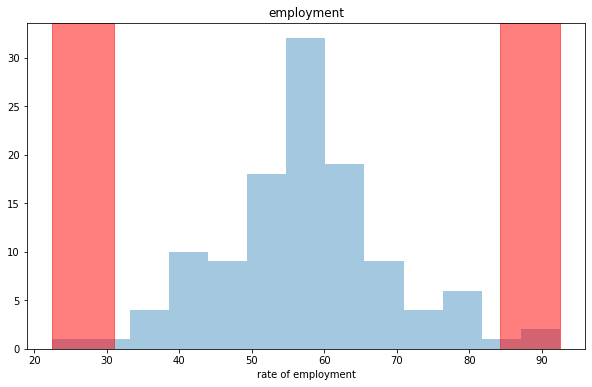

Upper Limit : 18.27
Lower Limit : -4.11
Outliers in unemployment column : 
economy
BIH    27.69
CPV    31.31
ESP    22.06
GRC    24.98
GRD    22.90
MKD    26.43
PSE    23.00
XKX    32.84
ZAF    22.87
Name: unemployment, dtype: float64

Number of Outliers : 9


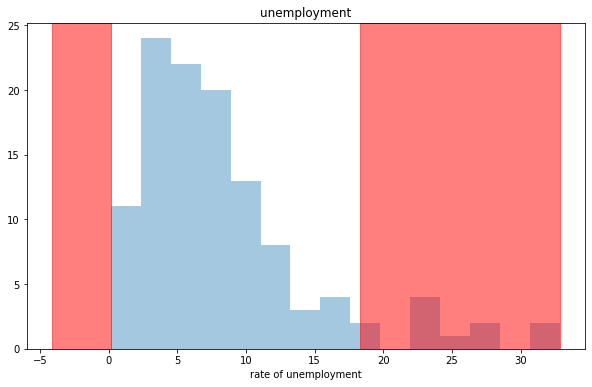

In [286]:
indicators = ["employment", "unemployment"]
www(empl_unempl_world, indicators)

<p style="color:black; background-color:white; padding:5px;">The two histograms clearly show the number of outliers according to the Interquartile Range Method. In the unemployment rate we have 9 countries that meet this condition, and in the employment rate there are 4. </p> 

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-8px">2.3. Standard Deviation Method</h4>
<p style="color:black; background-color:white; padding:5px">Values that are greater than +3 standard deviations from the mean, or less than -3 standard deviations, are included as outliers in the output results.</p>

In [291]:
def standard_deviations_outliers (df, indicators):
    for indicator in indicators:
        data_mean = df[indicator].mean()
        data_std = df[indicator].std()
        
        threshold = data_std * 3
        
        Upper_Limit = round(data_mean + threshold,2)
        Lower_Limit = round(data_mean - threshold,2)
        
        print('The lower bound value is', Lower_Limit)
        print('The upper bound value is', Upper_Limit)
        
        df1 = df[df[indicator] > Upper_Limit]
        df2 = df[df[indicator] < Lower_Limit]
        
        outliers = df[indicator][(df[indicator]>Upper_Limit ) | (df[indicator] < Lower_Limit)]
        print(f"Outliers in {indicator} column : \n{outliers}\n")
        print(f"Number of Outliers : {outliers.shape[0]}")

        plt.figure(figsize = (10,5))
        sns.distplot(df[indicator], kde=False)
        plt.axvspan(xmin = Lower_Limit,xmax= df[indicator].min(),alpha=0.5, color='red')
        plt.axvspan(xmin = Upper_Limit,xmax= df[indicator].max(),alpha=0.5, color='red')

The lower bound value is 21.31
The upper bound value is 93.62
Outliers in employment column : 
Series([], Name: employment, dtype: float64)

Number of Outliers : 0
The lower bound value is -11.3
The upper bound value is 28.06
Outliers in unemployment column : 
economy
CPV    31.31
XKX    32.84
Name: unemployment, dtype: float64

Number of Outliers : 2


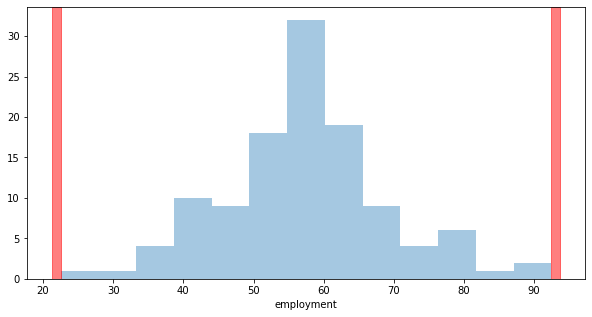

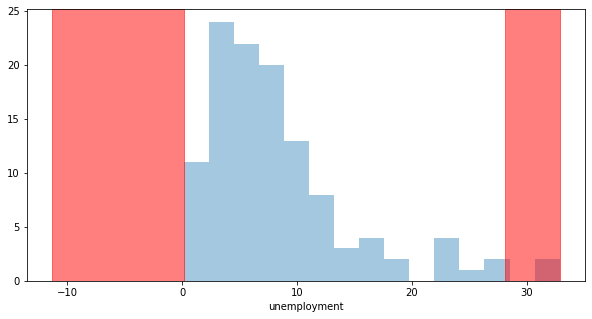

In [292]:
indicators = ["employment", "unemployment"]
standard_deviations_outliers(empl_unempl_world, indicators)

<p style="color:black; background-color:white; padding:5px;">The two histograms clearly show the number of outliers according to the Standard Deviation Method. In the unemployment rate we have 2 countries that meet this condition, and in the employment rate we have none. </p> 

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">3. Covariance tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic probalistics tools for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Robust covarianse;</li>
<li style="color:black; background-color:white; padding:5px">Empirical Covariance;</li>

In [351]:
def covariance_outlier (df):
    plt.figure(1, figsize=(10,6))

    # Define "classifiers" to be used
    classifiers = {
        "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
        "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
            contamination=0.25
        ),
    }
    colors = ["b", "g"]
    legend1 = {}
    legend2 = {}

    # Get data
    X1 = df.iloc[:,::-1].values

    # Learn a frontier for outlier detection with several classifiers
    xx1, yy1 = np.meshgrid(np.linspace(-5, 40, 500), np.linspace(20, 100, 500))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        plt.figure(1)
        clf.fit(X1)
        Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
        Z1 = Z1.reshape(xx1.shape)
        legend1[clf_name] = plt.contour(
            xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
        )

    legend1_values_list = list(legend1.values())
    legend1_keys_list = list(legend1.keys())

    # Plot the results (= shape of the data points cloud)
    plt.title("Outlier detection using Covariance methods")
    plt.scatter(X1[:, 0], X1[:, 1], color="black")
    bbox_args = dict(boxstyle="round", fc="0.8")
    arrow_args = dict(arrowstyle="->")

    plt.xlim((xx1.min(), xx1.max()))
    plt.ylim((yy1.min(), yy1.max()))
    plt.legend(
        (
            legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
        ),
        ("blue color: "+legend1_keys_list[0], "green color: "+legend1_keys_list[1]),
        loc="upper center",
        prop=matplotlib.font_manager.FontProperties(size=11),
    )
    plt.ylabel("rate of employment")
    plt.xlabel("rate of unemployment")

    plt.show()

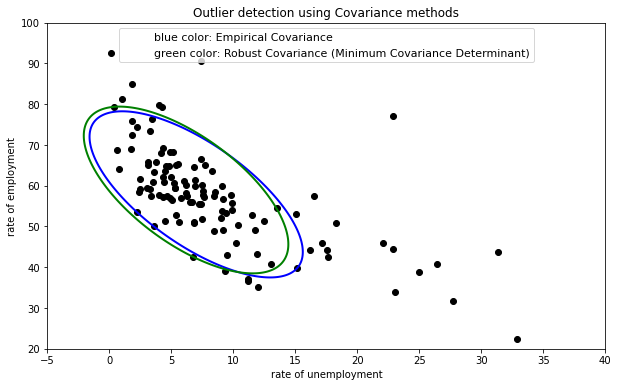

In [352]:
covariance_outlier(empl_unempl_world)

<p style="color:black; background-color:white; padding:5px;">The graph show the number of outliers according to the Covariance Method using Mahalanobis distance from this observation to the center, taking into account the covariance matrix. </p> 

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">4. Distance-based tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic distance-based tools for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">KNN;</li>

In [366]:
def KNN_outliers(df, value1,value2):
    
    nbrs = NearestNeighbors(n_neighbors = 3)
    nbrs.fit(df)
    
    distances, indexes = nbrs.kneighbors(df)
    plt.figure(figsize=(10,5))
    plt.plot(distances.mean(axis =1))
    plt.xlabel("countries")
    plt.ylabel("distances.mean")
    plt.figure(figsize=(12, 8))

    for i in range(1, 5):
        plt.subplot(2, 2, i)

        outlier_index = np.where(distances.mean(axis = 1) > i)
        outlier_index

        outlier_values = df.iloc[outlier_index]
        print(f"where distances.mean > {i}")
        print(outlier_values)
        print("--------------------------------------")

        # plot data
        plt.scatter(df[value2], df[value1], color = "b", s = 70)# plot outlier values
        plt.scatter(outlier_values[value2], outlier_values[value1], color = "r", s = 70)
        plt.title(f"distances.mean > {i}")
        plt.xlabel("rate of unemployment")
        plt.ylabel("rate of employment")
    plt.tight_layout()

where distances.mean > 1
         employment  unemployment
economy                          
ALB           45.96         17.19
ARM           50.92         18.26
BEL           48.79          8.48
BIH           31.74         27.69
BLR           81.30          1.00
BTN           61.60          2.45
COL           63.72          8.30
CPV           43.63         31.31
CUW           49.19         11.71
CYM           79.28          4.24
CYP           53.00         15.03
EGY           40.85         13.05
ESP           45.85         22.06
FRA           50.26         10.35
GEO           57.43         16.51
GRC           38.73         24.98
GRD           77.10         22.90
GRL           60.00          9.10
HRV           44.20         16.18
ISL           79.69          3.98
ITA           43.14         11.90
JAM           54.62         13.51
KHM           79.29          0.39
KIR           38.99          9.33
MAC           72.39          1.81
MAR           42.98          9.46
MDA           68.96    

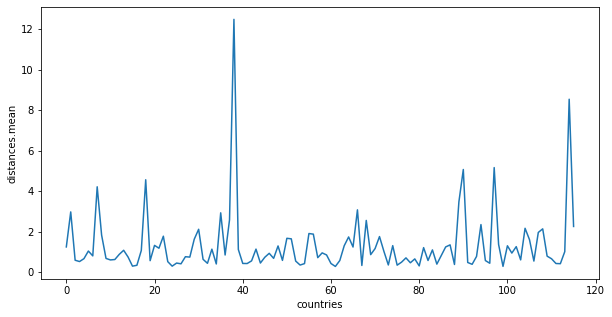

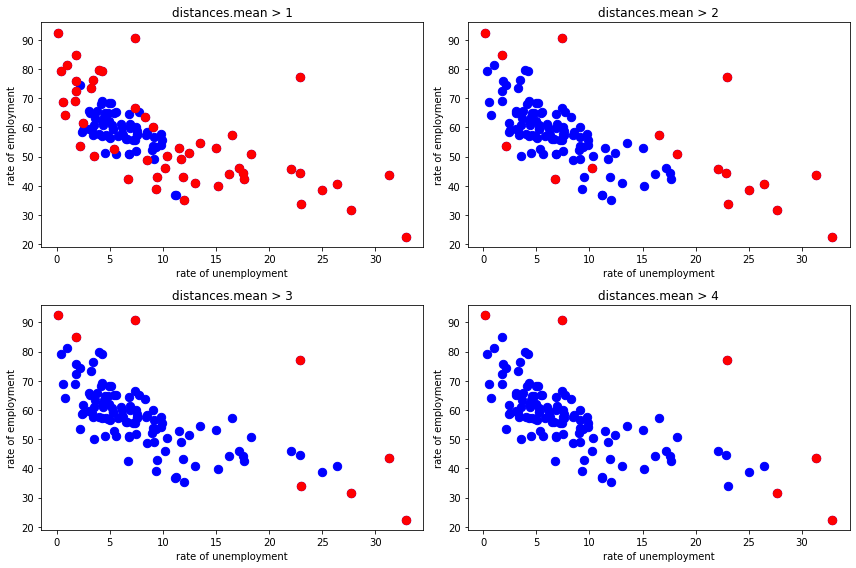

In [367]:
value1 = 'employment'
value2 = "unemployment"
KNN_outliers(empl_unempl_world, value1,value2)

<p style="color:black; background-color:white; padding:5px;">The graphs shows the number of outliers according to the KNN Method. KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are. In KNN, each column acts as a dimension and we can see haw the outliers change when we change the threshold for distance limit. The first graph shows us the distances between the individual countries. With the naked eye we can see that at a distance of more than 4 we have only 6 countries.</p> 

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">5. Density-based tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic density-based tools for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Local outlier factor (LOF);</li>

<p style="color:black; background-color:yellow; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">6. Clustering tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following clustering methods for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">K-means;</li>
<li style="color:black; background-color:white; padding:5px">DBSCAN;</li>
<li style="color:black; background-color:white; padding:5px">OPTICS;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">6.1. K-means Method</h4>
<p style="color:black; background-color:yellow; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

<p style="color:black; background-color:yellow; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">6.2. DBSCAN Method</h4>
<p style="color:black; background-color:yellow; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

<p style="color:black; background-color:yellow; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">6.3. OPTICS Method</h4>
<p style="color:black; background-color:yellow; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

<p style="color:black; background-color:yellow; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---